### Coursera Capstone

##### Credit risk analysis

1. Load data and libraries
2. Feature Engineering
3. EDA
4. Data modeling & Machine Learning


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
import lightgbm as lgb
from scipy import stats
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.model_selection import train_test_split
from scipy.stats import norm #for some statistics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

# Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
print("General Stats::")
print(data.info())
# print("Summary Stats::" )
# print(data.describe())

print("Number of rows::",data.shape[0])
print("Number of columns::",data.shape[1])

print("Column Names::",data.columns.values.tolist())
print("Columns with Missing Values::",data.columns[data.isnull().any()].tolist())

General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46639 entries, 0 to 46638
Data columns (total 19 columns):
Loan ID                         46639 non-null object
Customer ID                     46639 non-null object
Loan Status                     46639 non-null object
Current Loan Amount             46639 non-null int64
Term                            46639 non-null object
Credit Score                    36903 non-null float64
Annual Income                   36903 non-null float64
Years in current job            44433 non-null object
Home Ownership                  46639 non-null object
Purpose                         46639 non-null object
Monthly Debt                    46639 non-null float64
Years of Credit History         46639 non-null float64
Months since last delinquent    21613 non-null float64
Number of Open Accounts         46639 non-null int64
Number of Credit Problems       46639 non-null int64
Current Credit Balance          46639 non-null int64
Maximum Op

Дата тайлбар:

* Loan ID - Зээлийн дугаар 
* Customer ID - Зээлдэгчийн дугаар 
* Loan Status - Зээлээ төлсөн эсвэл төлөөгүй эсэх 
* Current Loan Amount - Зээлийн хэмжээ 
* Term - Зээлийн хугацаа 
* Credit Score - Хэрэглэгчийн зээлжих зэрэглэлийн оноо 
* Annual Income - Жилийн орлого 
* Years in current job - Одоо байгаа ажилдаа ажилласан жил 
* Home Ownership - Орон сууцны эзэмшлийн төрөл 
* Purpose - Зээл авсан зорилго 
* Monthly Debt - Сарын өр төлбөр 
* Years of Credit History - Зээлийн түүх үүссэн жил 
* Months since last delinquent - Чанаргүй зээлээс хойшхи сар 
* Number of Open Accounts - Нээлттэй дансны тоо 
* Number of Credit Problems - Зээлийн асуудлын тоо 
* Current Credit Balance - Одоогийн зээлийн дүн
* Maximum Open Credit - Хамгийн их зээлийн хэмжээ 
* Bankruptcies - Зээлээ барагдуулж чадаагүй тоо 
* Tax Liens - Татварын барьцаа 

In [4]:
data[:5]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
1,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
2,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,Charged Off,653004,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,NaN,9,0,302309,413754.0,0.0,0.0
3,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4,0,60287,126940.0,0.0,0.0
4,c7e2b784-016b-4fc4-8fde-623f09126557,5b53e176-8fc7-48bf-9d78-ceb5aa284f36,Charged Off,153252,Short Term,714.0,1890690.0,2 years,Rent,Debt Consolidation,21900.35,15.7,NaN,12,0,891594,1081014.0,0.0,0.0


In [5]:
data.describe(include = 'all')

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,46639,46639,46639,4.663900e+04,46639,36903.000000,3.690300e+04,44433,46639,46639,46639.000000,46639.000000,21613.000000,46639.000000,46639.000000,4.663900e+04,4.663700e+04,46541.000000,46633.000000
unique,44967,44967,2,NaN,2,NaN,NaN,11,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ffb700c9-5f5c-4c19-aa2e-6027d8990565,89905d93-8af2-4632-b5e9-da45c720cf5e,Fully Paid,NaN,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,2,24000,NaN,32196,NaN,NaN,14278,21940,36795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,7.926320e+06,NaN,1503.455925,1.345268e+06,NaN,NaN,NaN,18542.302291,18.100886,34.883450,11.170115,0.170372,2.932975e+05,7.420715e+05,0.116714,0.031394
std,NaN,NaN,NaN,2.646929e+07,NaN,2105.383301,1.236343e+06,NaN,NaN,NaN,12162.148571,7.034157,22.109431,5.022182,0.490578,3.736484e+05,8.545244e+06,0.347377,0.273573
min,NaN,NaN,NaN,1.124200e+04,NaN,585.000000,7.662700e+04,NaN,NaN,NaN,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,NaN,1.800040e+05,NaN,705.000000,8.297395e+05,NaN,NaN,NaN,10330.110000,13.300000,16.000000,8.000000,0.000000,1.149310e+05,2.713920e+05,0.000000,0.000000
50%,NaN,NaN,NaN,3.055140e+05,NaN,725.000000,1.148569e+06,NaN,NaN,NaN,16332.970000,16.800000,32.000000,10.000000,0.000000,2.118120e+05,4.600420e+05,0.000000,0.000000
75%,NaN,NaN,NaN,4.764650e+05,NaN,743.000000,1.604712e+06,NaN,NaN,NaN,24021.795000,21.600000,51.000000,14.000000,0.000000,3.681820e+05,7.661280e+05,0.000000,0.000000


# Feature Engineering

Target Variable = loan_status

Бидний таамаглах таргет хувьсагч бол тухайн хэрэглэгч зээлээ бүрэн төлсөн үү, эсвэл төлөөгүй найдваргүй зээлдэгч болсон уу гэдгийг илтгэх ‘loan_status’ гэсэн хувьсагч байгаа. 

Энэ хувьсагчаа Dummy хувьсагч болгон өөрчилье.
* target -> 1 if loan_status = ‘Charged Off’ /Зээлээ төлөөгүй/ 
* target -> 0 if loan_status = ‘Fully Paid’ /Бүрэн төлсөн/

Хэрэв зээлдэгч “Charged Off” буюу зээлээ төлөөгүй бол 1, зээлээ бүрэн төлсөн бол 0.

In [6]:
data['Loan Status'].value_counts()

Fully Paid     24000
Charged Off    22639
Name: Loan Status, dtype: int64

In [7]:
data['target'] = np.where(data['Loan Status'] == 'Charged Off', 1, 0)

In [8]:
data[:3]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,target
0,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0,1
1,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0,1
2,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,Charged Off,653004,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,NaN,9,0,302309,413754.0,0.0,0.0,1


In [9]:
data = data.rename(columns = {'Current Loan Amount':'Current_Loan_Amount'})

In [10]:
# Filtering variable
df = (data.Current_Loan_Amount != 99999999)
# new table
df2 = data.loc[df]
df2['Current_Loan_Amount'].mean()

317454.61273474316

#### Data error

In [11]:
d = {99999999:312314}
data['Current_Loan_Amount'] = data['Current_Loan_Amount'].replace(d)
data[:3]

,Loan ID,Customer ID,Loan Status,Current_Loan_Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,target
0,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0,1
1,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0,1
2,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,Charged Off,653004,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,NaN,9,0,302309,413754.0,0.0,0.0,1


#### Missing Value

In [12]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(data)

Your selected dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,25026,53.7
Credit Score,9736,20.9
Annual Income,9736,20.9
Years in current job,2206,4.7
Bankruptcies,98,0.2
Tax Liens,6,0.0
Maximum Open Credit,2,0.0


In [13]:
data['Months since last delinquent'].fillna((0), inplace = True)
# data['Months since last delinquent'] = np.where(data['Months since last delinquent'] == 0, 0, 1)
data[:3]

,Loan ID,Customer ID,Loan Status,Current_Loan_Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,target
0,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,0.0,6,0,215308,272448.0,0.0,0.0,1
1,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0,1
2,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,Charged Off,653004,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,0.0,9,0,302309,413754.0,0.0,0.0,1


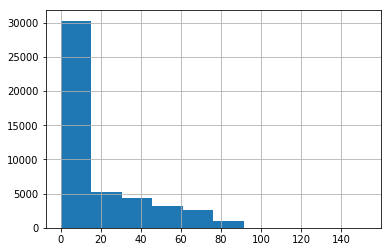

In [14]:
data['Months since last delinquent'].hist()

In [15]:
missing_values_table(data)

Your selected dataframe has 20 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,9736,20.9
Annual Income,9736,20.9
Years in current job,2206,4.7
Bankruptcies,98,0.2
Tax Liens,6,0.0
Maximum Open Credit,2,0.0


In [16]:
data['Credit Score'].fillna((0), inplace=True)
data['Annual Income'].fillna((data['Annual Income'].median()), inplace=True)
data['Bankruptcies'].fillna((0), inplace=True)
data['Tax Liens'].fillna((0), inplace=True)
data['Maximum Open Credit'].fillna((0), inplace=True)

In [17]:
data['Years in current job'].fillna('year_missing', inplace=True)

In [18]:
missing_values_table(data)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Outliers

Outlier утгуудыг устгах

Хураангуй статистикуудаас харвал Annual Income, Monthly Debt, Current Credit Balance, Maximum Open Credit хувьсагчдын max утгуудыг харвал хэт өндөр байгааг харж болохоор байна. Иймд эдгээр хувьсагчдын ТОП 5%-г устгах замаар датагаа цэвэрлэе. 

In [19]:
data = data.rename(columns = {'Annual Income':'AnnualIncome'})
data = data.rename(columns = {'Monthly Debt':'MonthlyDebt'})
data = data.rename(columns = {'Current Credit Balance':'CurrentCreditBalance'})
data = data.rename(columns = {'Maximum Open Credit':'MaximumOpenCredit'})
data = data.rename(columns = {'Credit Score':'CreditScore'})

In [20]:
data.describe()

,Current_Loan_Amount,CreditScore,AnnualIncome,MonthlyDebt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,Tax Liens,target
count,46639.000000,46639.000000,4.663900e+04,46639.000000,46639.000000,46639.000000,46639.000000,46639.000000,4.663900e+04,4.663900e+04,46639.000000,46639.000000,46639.000000
mean,317062.224790,1189.605995,1.304207e+06,18542.302291,18.100886,16.165355,11.170115,0.170372,2.932975e+05,7.420397e+05,0.116469,0.031390,0.485409
std,178930.916394,1969.939358,1.102652e+06,12162.148571,7.034157,23.002457,5.022182,0.490578,3.736484e+05,8.545062e+06,0.347053,0.273556,0.499792
min,11242.000000,0.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,180004.000000,660.000000,9.146315e+05,10330.110000,13.300000,0.000000,8.000000,0.000000,1.149310e+05,2.713700e+05,0.000000,0.000000,0.000000
50%,305514.000000,716.000000,1.148569e+06,16332.970000,16.800000,0.000000,10.000000,0.000000,2.118120e+05,4.600200e+05,0.000000,0.000000,0.000000
75%,426591.000000,739.000000,1.453738e+06,24021.795000,21.600000,29.000000,14.000000,0.000000,3.681820e+05,7.660510e+05,0.000000,0.000000,1.000000
max,789250.000000,7510.000000,1.655574e+08,435843.280000,70.500000,152.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,5.000000,15.000000,1.000000


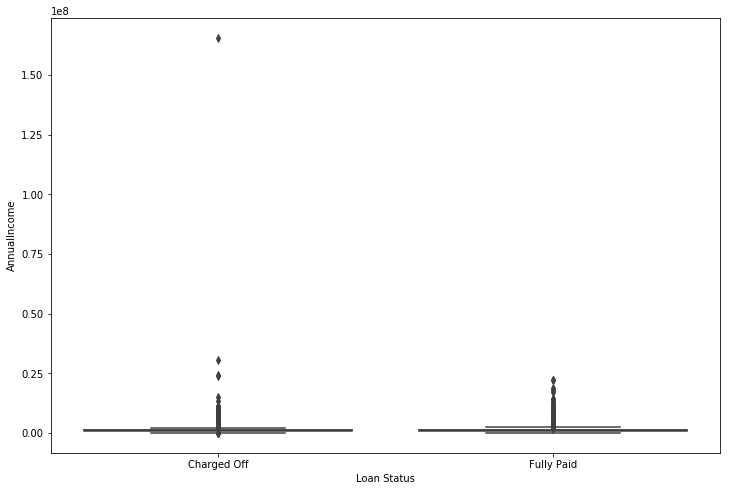

count        46.639000
mean       1304.206964
std        1102.651670
min          76.627000
25%         914.631500
50%        1148.569000
75%        1453.737500
max      165557.393000
Name: AnnualIncome, dtype: float64

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Loan Status", y="AnnualIncome", data=data)
plt.show()
data['AnnualIncome'].describe()/1000

In [22]:
# Removing outliers from data
data = data[np.abs(data.AnnualIncome-data.AnnualIncome.mean()) <= (2*data.AnnualIncome.std())]
data['AnnualIncome'].describe()/1000

count      45.833000
mean     1233.786895
std       533.071945
min        76.627000
25%       904.970000
50%      1148.569000
75%      1422.150000
max      3508.198000
Name: AnnualIncome, dtype: float64

In [23]:
#data = data[np.abs(data.MonthlyDebt-data.MonthlyDebt.mean()) <= (2*data.MonthlyDebt.std())]
#data = data[np.abs(data.CurrentCreditBalance-data.CurrentCreditBalance.mean()) <= (2*data.CurrentCreditBalance.std())]
#data = data[np.abs(data.MaximumOpenCredit-data.MaximumOpenCredit.mean()) <= (2*data.MaximumOpenCredit.std())]

In [24]:
data.describe()/1000

,Current_Loan_Amount,CreditScore,AnnualIncome,MonthlyDebt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,Tax Liens,target
count,45.833000,45.833000,45.833000,45.833000,45.833000,45.833000,45.833000,45.83300,45.833000,4.583300e+01,45.833000,45.833000,45.833000
mean,313.643946,1.187775,1233.786895,18.106189,0.018038,0.016165,0.011139,0.00017,284.299217,7.173590e+02,0.000118,0.000030,0.000488
std,176.510230,1.972077,533.071945,11.182115,0.007013,0.023027,0.005001,0.00049,308.414369,8.528398e+03,0.000349,0.000269,0.000500
min,11.242000,0.000000,76.627000,0.000000,0.003600,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,179.146000,0.658000,904.970000,10.243660,0.013300,0.000000,0.008000,0.00000,114.152000,2.694120e+02,0.000000,0.000000,0.000000
50%,300.916000,0.716000,1148.569000,16.173180,0.016800,0.000000,0.010000,0.00000,209.855000,4.553340e+02,0.000000,0.000000,0.000000
75%,418.242000,0.739000,1422.150000,23.692430,0.021500,0.029000,0.014000,0.00000,362.425000,7.551500e+02,0.000000,0.000000,0.001000
max,789.250000,7.510000,3508.198000,152.512240,0.070500,0.152000,0.076000,0.01500,7666.747000,1.539738e+06,0.005000,0.015000,0.001000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45833 entries, 0 to 46638
Data columns (total 20 columns):
Loan ID                         45833 non-null object
Customer ID                     45833 non-null object
Loan Status                     45833 non-null object
Current_Loan_Amount             45833 non-null int64
Term                            45833 non-null object
CreditScore                     45833 non-null float64
AnnualIncome                    45833 non-null float64
Years in current job            45833 non-null object
Home Ownership                  45833 non-null object
Purpose                         45833 non-null object
MonthlyDebt                     45833 non-null float64
Years of Credit History         45833 non-null float64
Months since last delinquent    45833 non-null float64
Number of Open Accounts         45833 non-null int64
Number of Credit Problems       45833 non-null int64
CurrentCreditBalance            45833 non-null int64
MaximumOpenCredit         

In [26]:
del data['Loan ID']
del data['Customer ID']
del data['Loan Status']

In [27]:
cat_feat = data.select_dtypes(include=['object'])
num_feat = data.select_dtypes(include=['float64', 'int64', 'int32'])

In [28]:
cat_feat[:3]

,Term,Years in current job,Home Ownership,Purpose
0,Short Term,10+ years,Home Mortgage,Debt Consolidation
1,Long Term,< 1 year,Home Mortgage,Buy House
2,Long Term,7 years,Home Mortgage,Debt Consolidation


In [29]:
num_feat[:3]

,Current_Loan_Amount,CreditScore,AnnualIncome,MonthlyDebt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,Tax Liens,target
0,206602,7290.0,896857.0,16367.74,17.3,0.0,6,0,215308,272448.0,0.0,0.0,1
1,648714,0.0,1148569.0,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0,1
2,653004,0.0,1148569.0,14537.09,20.5,0.0,9,0,302309,413754.0,0.0,0.0,1


In [30]:
num_feat['debt_ratio'] = num_feat['MonthlyDebt']/(num_feat['AnnualIncome']/12)
num_feat['credit_ratio'] = num_feat['CurrentCreditBalance']/(num_feat['AnnualIncome']/12)
num_feat[:3]

,Current_Loan_Amount,CreditScore,AnnualIncome,MonthlyDebt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,Tax Liens,target,debt_ratio,credit_ratio
0,206602,7290.0,896857.0,16367.74,17.3,0.0,6,0,215308,272448.0,0.0,0.0,1,0.219001,2.880834
1,648714,0.0,1148569.0,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0,1,0.154691,2.019619
2,653004,0.0,1148569.0,14537.09,20.5,0.0,9,0,302309,413754.0,0.0,0.0,1,0.151880,3.158459


### One hot encoding

In [31]:
transformed_data = pd.get_dummies(cat_feat)
transformed_data.columns.values

array(['Term_Long Term', 'Term_Short Term', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Years in current job_year_missing', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan',
       'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills',
       'Purpose_Other', 'Purpose_Take a Trip', 'Purpose_major_purchase',
       'Purpose_moving', 'Purpose_other', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacatio

In [32]:
transformed_data = transformed_data[['Term_Short Term', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Years in current job_year_missing', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan',
       'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills',
       'Purpose_Other', 'Purpose_Take a Trip', 'Purpose_major_purchase',
       'Purpose_moving', 'Purpose_other', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding']]

### Min max scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler
def min_max_scale_data(numerical_data):
    scaler = MinMaxScaler().fit(numerical_data)
    data = pd.DataFrame(scaler.transform(numerical_data), columns=numerical_data.columns.values, index=numerical_data.index)
    return data

In [34]:
num_feat2 = min_max_scale_data(num_feat)

In [35]:
num_feat2[:3]

,Current_Loan_Amount,CreditScore,AnnualIncome,MonthlyDebt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,Tax Liens,target,debt_ratio,credit_ratio
0,0.251103,0.970706,0.239025,0.107321,0.204783,0.000000,0.078947,0.0,0.028083,0.000177,0.0,0.0,1.0,0.137442,0.023495
1,0.819364,0.000000,0.312376,0.097082,0.068759,0.052632,0.197368,0.0,0.025214,0.000561,0.0,0.0,1.0,0.097082,0.016471
2,0.824878,0.000000,0.312376,0.095318,0.252616,0.000000,0.118421,0.0,0.039431,0.000269,0.0,0.0,1.0,0.095318,0.025759


In [36]:
data2 = pd.concat([num_feat2, transformed_data], axis=1, ignore_index=False)
data2.shape[0]

45833

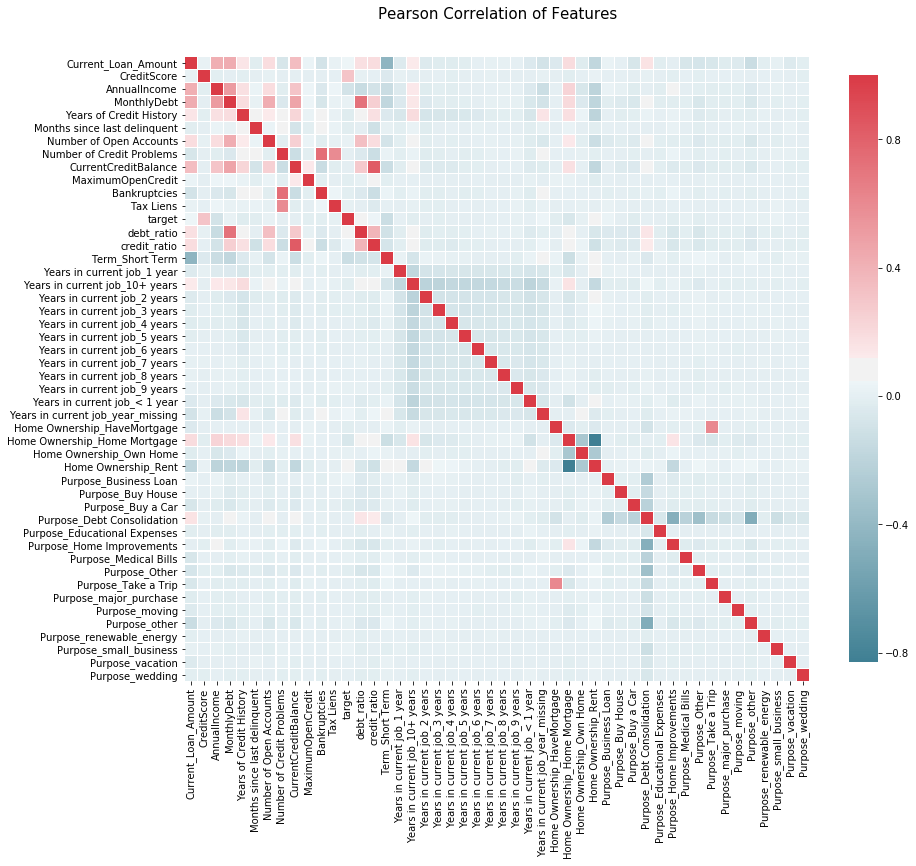

In [37]:
#correlation heatmap of dataset
import seaborn as sns
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=False, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data2)

In [38]:
# Find correlations with the target and sorted variables
correlations = data2.corr()['target'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(9))
print('\nMost Negative Correlations:\n', correlations.head(7))

Most Positive Correlations:
 Purpose_small_business               0.027617
Purpose_Business Loan                0.029069
credit_ratio                         0.035191
Years in current job_year_missing    0.040096
Current_Loan_Amount                  0.047503
Home Ownership_Rent                  0.059649
debt_ratio                           0.088530
CreditScore                          0.312460
target                               1.000000
Name: target, dtype: float64

Most Negative Correlations:
 Term_Short Term                  -0.126749
AnnualIncome                     -0.090929
Home Ownership_Home Mortgage     -0.062035
Years of Credit History          -0.025958
Purpose_Buy a Car                -0.025753
Purpose_Other                    -0.021596
Years in current job_10+ years   -0.018315
Name: target, dtype: float64


# Machine learning model

In [39]:
"""Train and Test Split"""    
X = data2.drop("target", axis=1)
y = data2["target"].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3)

In [40]:
X_train.columns.values

array(['Current_Loan_Amount', 'CreditScore', 'AnnualIncome',
       'MonthlyDebt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'CurrentCreditBalance',
       'MaximumOpenCredit', 'Bankruptcies', 'Tax Liens', 'debt_ratio',
       'credit_ratio', 'Term_Short Term', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Years in current job_year_missing', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Business Loan',
       'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_D

#### Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

#accuracy on test set unseen data
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.6523636363636364

In [43]:
rnd_clf2 = RandomForestClassifier(n_estimators=720, max_leaf_nodes=32, max_features = 16, n_jobs=-1)
rnd_clf2.fit(X_train, y_train)

#accuracy on training data
y_pred_rf_train = rnd_clf2.predict(X_train)
accuracy_score(y_train, y_pred_rf_train)

0.6785836735966088

In [44]:
#accuracy on test set unseen data
y_pred_rf = rnd_clf2.predict(X_test)
accuracy_score(y_test, y_pred_rf) # 0.6640222984562607

0.6687272727272727

In [45]:
y_pred_rf[:5]

array([0., 0., 0., 0., 1.])

In [46]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf)
cnf_matrix

array([[5538, 1500],
       [3055, 3657]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred_rf, labels=[1,0]))

[[3657 3055]
 [1500 5538]]


Confusion matrix, without normalization
[[3657 3055]
 [1500 5538]]


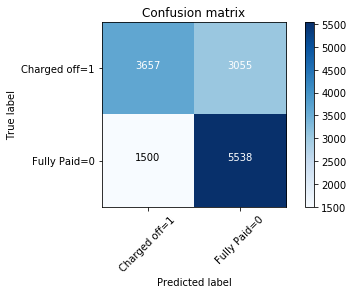

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Charged off=1','Fully Paid=0'],normalize= False,  title='Confusion matrix')

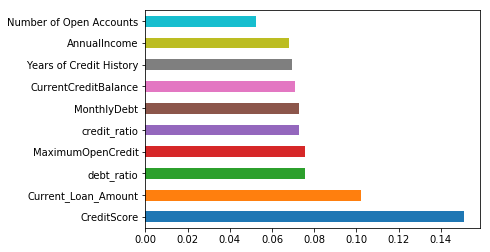

In [49]:
feat_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [50]:
y_pred_rf_prob = rnd_clf.predict_proba(X_test)
y_pred_rf_prob[:5]

array([[0.5, 0.5],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ]])

In [51]:
y_pred_rf_prob = pd.DataFrame(y_pred_rf_prob)

In [52]:
y_pred_rf_prob[:5]

,0,1
0,0.5,0.5
1,0.7,0.3
2,0.6,0.4
3,0.4,0.6
4,0.0,1.0


# Light GBM

In [53]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
import lightgbm as lgb
from scipy import stats
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import norm #for some statistics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [54]:
model_lgb = lgb.LGBMClassifier(num_leaves=5,
                              learning_rate=0.01, n_estimators=700,                              
                              max_bin = 60, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.1,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11
                              )

In [55]:
model_lgb.fit(X_train, y_train) 
y_pred_lgb = model_lgb.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred_lgb)

0.6615272727272727

In [57]:
param_grid_lgb = {
    'num_leaves': [5, 10],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [400, 700],
    'max_bin': [55, 70],
    'bagging_fraction': [0.4, 0.6],
    'bagging_freq':[3, 5],
    'feature_fraction':[0.159, 0.2319],
    'min_data_in_leaf':[6, 10] 
}


# Instantiate the grid search model
grid_search_lgb = GridSearchCV(estimator = model_lgb, param_grid = param_grid_lgb, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [58]:
# Fit the grid search to the data
# grid_search_lgb.fit(X_train, y_train)
# grid_search_lgb.best_params_

In [59]:
model_lgb2 = lgb.LGBMClassifier(num_leaves=10,
                              learning_rate=0.05, n_estimators=700,                              
                              max_bin = 70, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.159,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11
                              )

In [60]:
model_lgb2.fit(X_train, y_train) 
y_pred_lgb2 = model_lgb2.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred_lgb2) # 0.6760291595197255

0.6784

In [1]:
# import shap

In [63]:
explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(X_train)

C extension was not built during install!


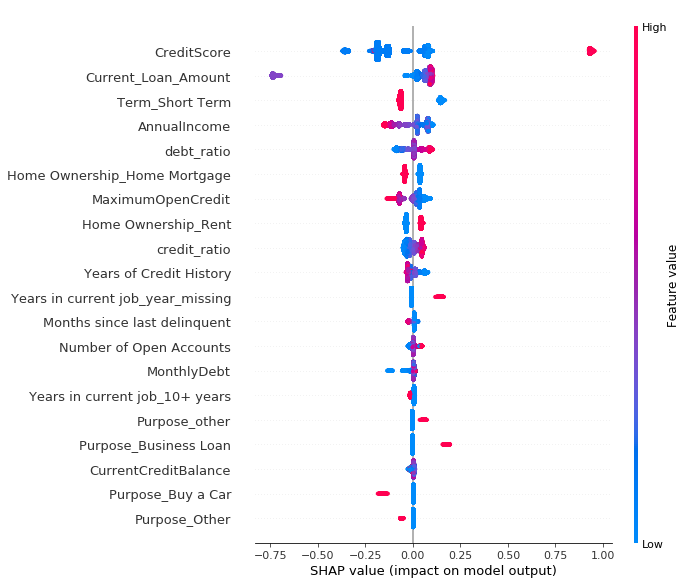

In [64]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

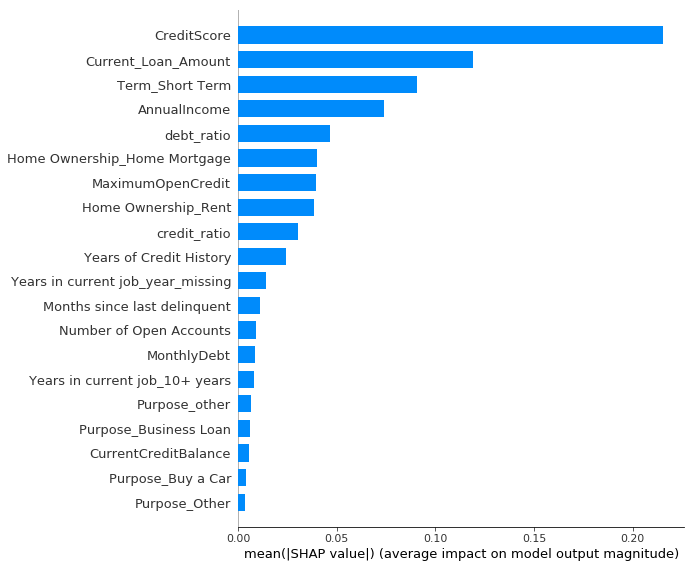

In [65]:
shap.summary_plot(shap_values, X_train, plot_type="bar")